# Importar librerias necesarias y diccionario de variables

In [97]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import numpy as np 
import seaborn as sns 
import requests
import json

## Diccionario de datos
- customerID: número de identificación único de cada cliente
- Churn: si el cliente dejó o no la empresa
- gender: género (masculino y femenino)
- SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- Partner: si el cliente tiene o no una pareja
- Dependents: si el cliente tiene o no dependientes
- tenure: meses de contrato del cliente
- PhoneService: suscripción al servicio telefónico 
- MultipleLines: suscripción a más de una línea telefónica
- InternetService: suscripción a un proveedor de internet (tipo)
- OnlineSecurity: suscripción adicional de seguridad en línea
- OnlineBackup: suscripción adicional de respaldo en línea
- DeviceProtection: suscripción adicional de protección del dispositivo
- TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
- StreamingTV: suscripción de televisión por cable
- StreamingMovies: suscripción de streaming de películas
- Contract: tipo de contrato
- PaperlessBilling: si el cliente prefiere recibir la factura en línea
- PaymentMethod: forma de pago
- Charges.Monthly: total de todos los servicios del cliente por mes
- Charges.Total: total gastado por el cliente

# Leer los datos 

In [75]:
datos = requests.get('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json')
resultado = json.loads(datos.text)
df = pd.DataFrame(resultado)

In [76]:
customer_df = pd.json_normalize(df['customer'])
phone_df    = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df  = pd.json_normalize(df['account'])

# Ahora concatenamos todo con las columnas originales que ya estaban planas
df = pd.concat(
    [df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df],
    axis=1
)

In [77]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


# Analisis exploratorio de datos 

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [79]:
df.isna().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

# Limpieza de datos 

## Datos nulos 

In [80]:
df['Charges.Total'].value_counts()
df['Charges.Total'] = df['Charges.Total'].replace('', pd.NA)
df = df.dropna(subset=['Charges.Total'])
df['Charges.Total'].value_counts()

Charges.Total
20.2       11
           11
19.75       9
19.9        9
19.55       9
           ..
4018.05     1
633.45      1
742.9       1
4627.65     1
7220.35     1
Name: count, Length: 6531, dtype: int64

In [81]:
df['Churn'].value_counts()
df['Churn'] = df['Churn'].replace('', pd.NA)
df = df.dropna(subset=['Churn'])
df['Churn'].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [82]:
df['Churn'].isna().sum()
df['Charges.Total'].isna().sum()

np.int64(0)

## Cambiar el tipo de datos al apropiado

In [83]:
columnas_str = ['SeniorCitizen']
columnas_float = ['Charges.Total']
df[columnas_str] = df[columnas_str].astype(str)
df[columnas_float] = df[columnas_float].replace(' ', np.nan).astype(float)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

## Reemplazar valor por fines de clariadad y analisis 

In [85]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace("1", "Si").replace("0","No")
col_yes_no = ['Churn','SeniorCitizen', 'Partner', 'Dependents']
for col in df[col_yes_no]:
    df[col] = df[col].replace('Yes','Si')

df['gender'] = df['gender'].replace("Female", "Mujer").replace("Male", "Hombre")

## Creación de columna de cuentas diarias

In [86]:
df['Cuentas_diarias'] = (df['Charges.Monthly']/30).round(2)

In [87]:
df.columns.tolist()

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'Cuentas_diarias']

In [88]:
col_order = ['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Cuentas_diarias',
 'Charges.Monthly',
 'Charges.Total']


df = df[col_order]

In [89]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cuentas_diarias,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Mujer,No,Si,Si,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.60,593.30
1,0003-MKNFE,No,Hombre,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.90,542.40
2,0004-TLHLJ,Si,Hombre,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.90,280.85
3,0011-IGKFF,Si,Hombre,Si,Si,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.00,1237.85
4,0013-EXCHZ,Si,Mujer,Si,Si,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Mujer,No,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,1.84,55.15,742.90
7263,9992-RRAMN,Si,Hombre,No,Si,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.84,85.10,1873.70
7264,9992-UJOEL,No,Hombre,No,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,1.68,50.30,92.75
7265,9993-LHIEB,No,Hombre,No,Si,Si,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,2.26,67.85,4627.65


In [90]:
df.describe()

,tenure,Cuentas_diarias,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,2.158675,64.761692,2283.300441
std,24.559481,1.003088,30.090047,2266.771362
min,0.000000,0.610000,18.250000,18.800000
25%,9.000000,1.180000,35.500000,401.450000
50%,29.000000,2.340000,70.350000,1397.475000
75%,55.000000,2.990000,89.850000,3794.737500
max,72.000000,3.960000,118.750000,8684.800000


# Analisis de datos

## Distribución de empleados que se mantuvieron en el servicio y los que se fueron

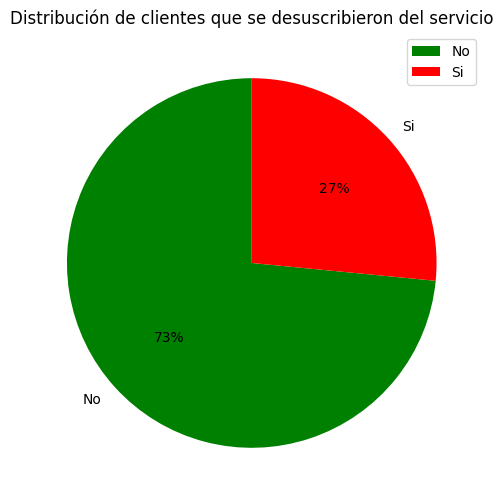

In [91]:
colors_pie = {'Si': 'red',
              'No': 'green'}
fig, ax = plt.subplots(figsize=(16, 6))
counts = df['Churn'].value_counts()
colors = [colors_pie[label] for label in counts.index]
wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.0f%%', startangle=90, colors=colors)
ax.set_title('Distribución de clientes que se desuscribieron del servicio')
ax.legend(wedges, counts.index, loc='upper right')
plt.show()

Podemos observar que la gran mayoría de los clientes se no han abandonado la empresa, aunque la empresa tiene un porcentaje considerable de clientes que han abandonado el servicio (cerca del 30%). Con el fin de entender mejor las caussas de la desuscripción, es importante analizar las características de los clientes que se han ido en comparación con los que se han quedado.

### Creación de dataframes separados por churn

In [92]:
# Dejo la empresa 
df_churn_yes = df[df['Churn'] == 'Si']

#Se quedo en la empresa 
df_churn_no = df[df['Churn'] == 'No']

### Estadísticas descripitivas de variables numéricas de clientes que se fueron

In [93]:
df_churn_yes.describe()

,tenure,Cuentas_diarias,Charges.Monthly,Charges.Total
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,17.979133,2.481450,74.441332,1531.796094
std,19.531123,0.822287,24.666053,1890.822994
min,1.000000,0.630000,18.850000,18.850000
25%,2.000000,1.870000,56.150000,134.500000
50%,10.000000,2.660000,79.650000,703.550000
75%,29.000000,3.140000,94.200000,2331.300000
max,72.000000,3.940000,118.350000,8684.800000


In [94]:
df_churn_no.describe()

,tenure,Cuentas_diarias,Charges.Monthly,Charges.Total
count,5174.000000,5174.000000,5174.000000,5163.000000
mean,37.569965,2.042080,61.265124,2555.344141
std,24.113777,1.036492,31.092648,2329.456984
min,0.000000,0.610000,18.250000,18.800000
25%,15.000000,0.840000,25.100000,577.825000
50%,38.000000,2.150000,64.425000,1683.600000
75%,61.000000,2.950000,88.400000,4264.125000
max,72.000000,3.960000,118.750000,8672.450000


Al analizar las estadísticas descriptivas de los clientes que se fueron en comparación con los que se han mantenido en el servicio, podemos identificar que los clientes que se fueron en promedio tienen una duracion del contrato menor en comparción con los que se han mantenido, lo cual es relativamente lógico. Al revisar el promeido de cobro mensual y diarios, podemos observar que los clientes que se han ido tienen en promedio mayores cobros mensuales y diarios, aunque el total de cobro si es mayor en los clientes que se han mantenido pero esto se puede explicar por la mayor duración del contrato. De igual forma es importante resaltar que el 75% de los clientes que se han ido tienen un cobre mensual y diario mayor a los que se han mantenido. La cantidad de cobro se puede explicar por los servicios contratados por lo tanto es importante analizar los servicios contratados por los clientes que se han ido y los que se han mantenido para entender mejor las causas de la desuscripción.

### Distribución de género

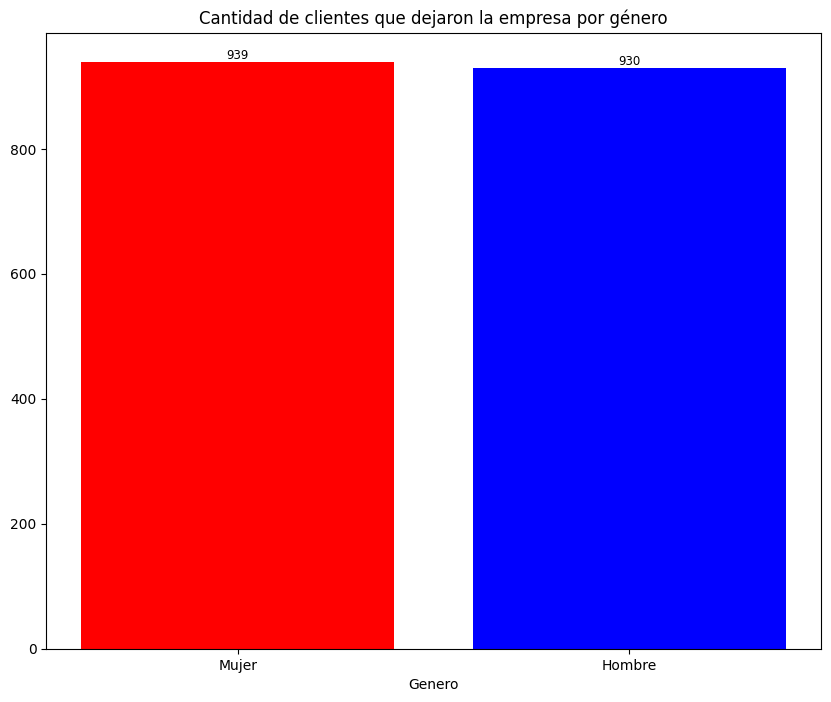

In [95]:
fig, ax = plt.subplots(figsize=(10, 8))

gender_colors = {"Mujer": "red",
                 "Hombre": "blue"}

gender_counts = df_churn_yes['gender'].value_counts()
colors_gender = [gender_colors[label] for label in gender_counts.index]
ax.bar(gender_counts.index, gender_counts.values, color = colors_gender)
for i, j in enumerate(gender_counts.values):
    ax.text(i, j, str(j), color='black', fontsize=8.5, ha='center', va='bottom')

ax.set_xlabel('Genero')
ax.set_title('Cantidad de clientes que dejaron la empresa por género')
plt.show()

Podemos observar que no hay mucha diferencia en terminos del género de los clientes que han abandonado el servicio, debido a que las distribuciones son bastante equilibradas entre hombres y mujeres. Por lo tanto, podemos concluir que el género no es un factor determinante en la decisión de abandonar el servicio. 

### Datos demograficos de los clientes que abandonaron el servicio contra los que no abandonaron el servicio (senior citizen, partner, dependents)

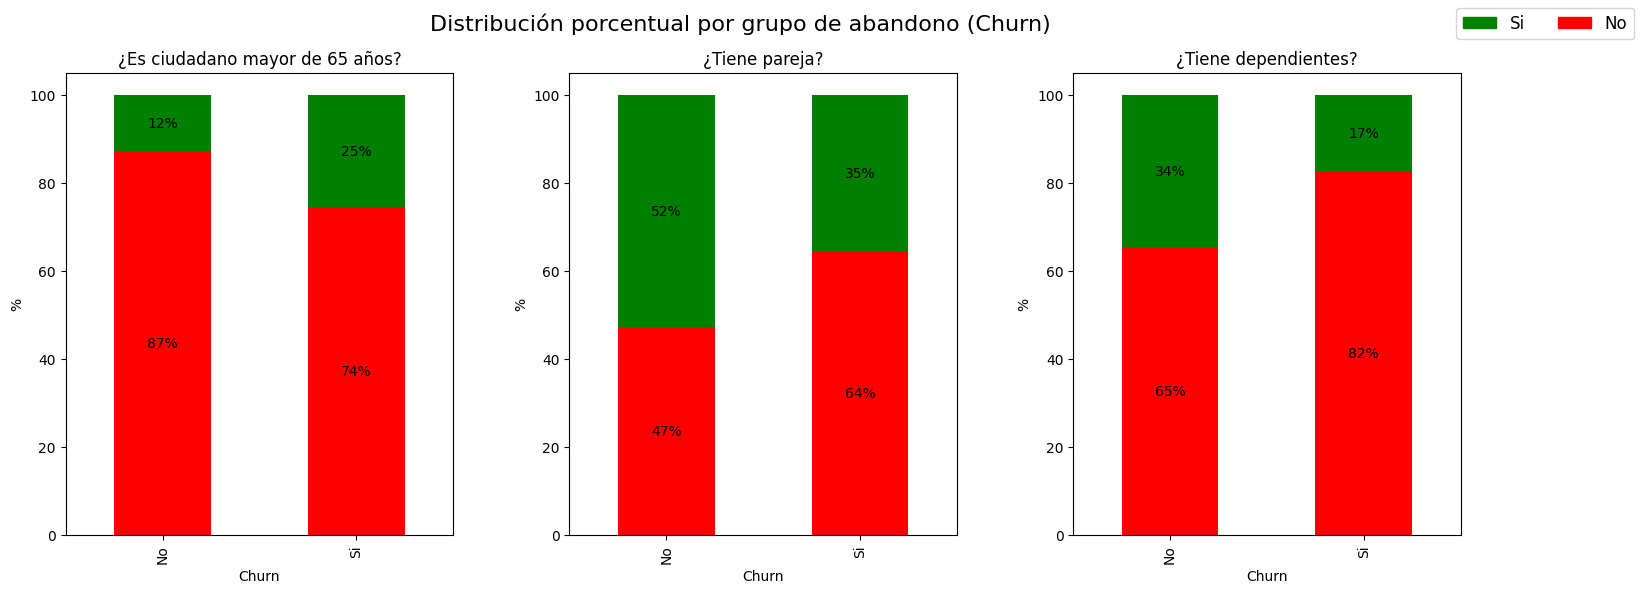

In [102]:
def get_stacked_percentage(var):
    counts = df.groupby(['Churn', var]).size().unstack(fill_value=0)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100
    return percentages


def add_labels(ax, df):
    for i, row in enumerate(df.values):
        cumulative = 0
        for j, val in enumerate(row):
            if val > 0:
                label = f"{int(val)}%"  
                ax.text(i, cumulative + val / 2, label, ha='center', va='center', fontsize=10)
                cumulative += val

senior_pct = get_stacked_percentage('SeniorCitizen')
partner_pct = get_stacked_percentage('Partner')
dependents_pct = get_stacked_percentage('Dependents')

color_dicts = {
    'Categorical_Yes_No': {'Si': 'green', 'No': 'red'},}

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.subplots_adjust(wspace=0.3)
fig.suptitle('Distribución porcentual por grupo de abandono (Churn)', fontsize=16)
legend_patches = [
    mpatches.Patch(color='green', label='Si'),
    mpatches.Patch(color='red', label='No')
]

fig.legend(handles= legend_patches, loc = 'upper right', ncol = 2, fontsize = 12)

senior_pct.plot(kind='bar', stacked=True, ax=axs[0], color=[color_dicts['Categorical_Yes_No'][x] for x in senior_pct.columns], legend= False)
axs[0].set_title('¿Es ciudadano mayor de 65 años?')
axs[0].set_ylabel('%')
add_labels(axs[0], senior_pct)

partner_pct.plot(kind='bar', stacked=True, ax=axs[1], color=[color_dicts['Categorical_Yes_No'][x] for x in partner_pct.columns], legend= False)
axs[1].set_title('¿Tiene pareja?')
axs[1].set_ylabel('%')
add_labels(axs[1],partner_pct)


dependents_pct.plot(kind='bar', stacked=True, ax=axs[2], color=[color_dicts['Categorical_Yes_No'][x] for x in dependents_pct.columns], legend= False)
axs[2].set_title('¿Tiene dependientes?')
axs[2].set_ylabel('%')
add_labels(axs[2],dependents_pct)


plt.show()
